In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import glob
import tensorflow as tf
import note_seq

from pathlib import PurePath

import vxs
import vxs.utils as vxsu

In [2]:
generator = vxs.load_generator_from_bundle('../data/drum_kit_rnn.mag')
generator.initialize()

'model_variables' collection should be of type 'byte_list', but instead is of type 'node_list'.
INFO:tensorflow:Restoring parameters from /tmp/tmpxogsvhj7/model.ckpt


In [3]:
model = generator._model

In [41]:
track_len = 32*8
empty_primer = note_seq.DrumTrack([frozenset([36])], start_step=0, steps_per_bar=4, steps_per_quarter=4)
empty_primer.set_length(1)
track_raw = model.generate_drum_track(track_len, empty_primer, temperature=1.5)
track = track_raw.to_sequence(qpm=120)

INFO:tensorflow:Beam search yields sequence with log-likelihood: -327.193542 


In [42]:
#track = vxs.generate_track(generator, 32*8, temperature=1.2, branch_factor=1, beam_size=1, steps_per_iteration=1)

In [43]:
note_seq.plot_sequence(track)

Loading BokehJS ...

In [44]:
sound_track = vxs.Track(note_seq.fluidsynth(track, sample_rate=44100))

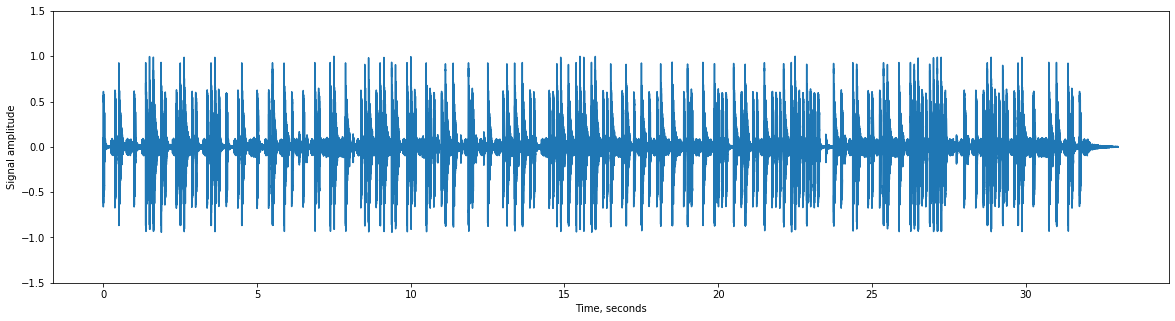

In [45]:
vxsu.plot_track(sound_track)

In [46]:
vxsu.play_audio(sound_track)